The Objetive of the NMF is Find two non-negative matrices (W, H) whose product approximates the non-negative matrix X.
This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

# Using Scikit-learn
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [1]:
import numpy as np
from sklearn.decomposition import NMF

Defining the model

In [25]:
K = 4
model = NMF(n_components=K) 
model

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=4, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

A test Array

In [26]:
Original = [
    [5,3,0,1],
    [4,0,0,1],
    [3,2,0,0],
    [7,0,4,1],
    [0,2,5,0]
]
Original = np.array(Original)

In [27]:
W = model.fit_transform(Original)
H = model.components_

In [28]:
print("W\n",np.round(W,2))
print("H\n",np.round(H,2))

W
 [[ 1.2   0.8   1.94  0.  ]
 [ 0.55  0.    1.95  0.  ]
 [ 1.89  0.54  0.    0.  ]
 [ 2.44  0.    1.95  1.14]
 [ 0.    0.54  0.    1.42]]
H
 [[ 1.59  0.    0.    0.  ]
 [ 0.    3.73  0.    0.  ]
 [ 1.6   0.    0.    0.51]
 [ 0.    0.    3.52  0.  ]]


Now lets see how mush close to X are WxH and lets call it crossValue

In [6]:
crossValue = np.dot(W,H)
print("crossValue \n",crossValue)
print("rounded Values\n",np.round(crossValue,2))
print("Original\n",Original)

crossValue 
 [[  5.03046559e+00   2.99952984e+00   2.29664084e-07   8.11730696e-01]
 [  4.05529449e+00   0.00000000e+00   1.86884347e-07   6.60528886e-01]
 [  2.92314290e+00   2.00121146e+00   1.33269074e-07   4.71029674e-01]
 [  6.97775964e+00   6.43457512e-04   3.99999976e+00   1.13654183e+00]
 [  3.12329097e-02   1.99949260e+00   5.00000019e+00   0.00000000e+00]]
rounded Values
 [[ 5.03  3.    0.    0.81]
 [ 4.06  0.    0.    0.66]
 [ 2.92  2.    0.    0.47]
 [ 6.98  0.    4.    1.14]
 [ 0.03  2.    5.    0.  ]]
Original
 [[5 3 0 1]
 [4 0 0 1]
 [3 2 0 0]
 [7 0 4 1]
 [0 2 5 0]]


In [17]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.17       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
#    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last],2), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Last Value')
    ax.set_title('Row Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0]), ('Original', 'Cross Value'))

    plt.show()

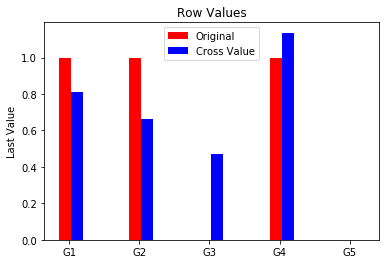

In [18]:
plotCompare(Original,crossValue)

## Using an independent Implementation from
http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

Modified by DavidGutierrez
<br><b>R :</b> A matrix to be factorized, dimension N x M
<br><b>K :</b> The number of latent features
<br><b>Steps :</b> The maximum number of steps to perform the optimisation
<br><b>Alpha :</b> The learning rate
<br><b>Beta :</b> The regularization parameter
<br>The final matrices W and H

In [9]:
def matrix_factorization(R, K = 2, steps=5000, alpha=0.0002, beta=0.02,error = 0.001):
    W = np.random.rand(len(R),K)
    H = np.random.rand(K,len(R[0]))
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(W[i,:],H[:,j])
                    for k in range(K):
                        W[i][k] = W[i][k] + alpha * (2 * eij * H[k][j] - beta * W[i][k])
                        H[k][j] = H[k][j] + alpha * (2 * eij * W[i][k] - beta * H[k][j])
#        eR = np.dot(W,H)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(W[i,:],H[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(W[i][k],2) + pow(H[k][j],2) )
        if e < error:
            break
    return W,H

In [10]:
W, H = matrix_factorization(Original,K)

In [11]:
W

array([[ 1.27400028,  1.04872357,  0.79882763],
       [ 0.80942037,  0.78741285,  0.86725508],
       [ 0.3343696 ,  0.87369487,  0.61370185],
       [ 1.22946785,  1.98119779,  0.7296027 ],
       [ 1.36976519,  0.44254733,  1.5976221 ]])

In [12]:
H

array([[ 1.51096272,  0.60613373,  1.17278376,  0.30635648],
       [ 2.01389272,  1.49513784,  0.67746003,  0.09406091],
       [ 1.36757285,  0.48558875,  1.83642104,  0.65647615]])

In [13]:
prediction = np.dot(W,H)
print(prediction)

[[ 5.12943865  2.72810253  3.67157899  1.01335342]
 [ 3.99480351  2.08903704  3.07536128  0.89136822]
 [ 3.10402974  1.80697367  2.11105159  0.58749746]
 [ 6.84538474  4.06167258  4.12393999  1.04197549]
 [ 5.14577159  2.26771746  4.84015334  1.51006366]]


In [14]:
np.around(prediction,2)

array([[ 5.13,  2.73,  3.67,  1.01],
       [ 3.99,  2.09,  3.08,  0.89],
       [ 3.1 ,  1.81,  2.11,  0.59],
       [ 6.85,  4.06,  4.12,  1.04],
       [ 5.15,  2.27,  4.84,  1.51]])

In [15]:
Original

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [3, 2, 0, 0],
       [7, 0, 4, 1],
       [0, 2, 5, 0]])

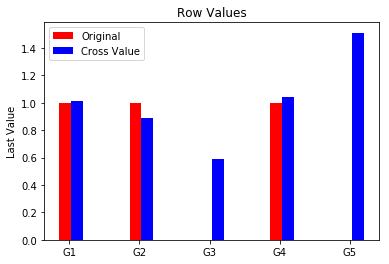

In [19]:
plotCompare(Original,prediction)